# Final Projects: Calculating evolutionary distance

In this notebook you will compare the amino acid sequence of hemoglobin alpha from 3 different species to find out which two are most closely related.

You'll need to copy and paste the function from last class that finds the number of differences in two sequences:

In [1]:
#Converts the DNA to RNA
def translation(rnaseq):
    ProteinDict = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L", "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L", "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M", "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V", "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S", "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P", "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T", "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A", "UAU":"Y", "UAC":"Y", "UAA":"X", "UAG":"X", "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q", "AAU": "N", "AAC":"N", "AAA":"K", "AAG":"K", "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E", "UGU":"C", "UGC":"C", "UGA":"", "UGG":"W", "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R", "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R", "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G"} 
    codon = ""
    protein = ""
    for base in rnaseq:
        codon += base
        if len(codon) == 3:
            protein += ProteinDict[codon]
            codon = ""
    return protein
    print(codon)
#Converts the RNA to amino acid sequences
def transcribe(sequence):
    dna_seq = {"A":"U", "T":"A", "G":"C", "C":"G"}
    s = ""
    dna = ""
    for letter in sequence:
        s += dna_seq[letter]
    return s



In order to compare the different amino acid sequences, we need to open the files and read the sequences into new variables:

In [2]:
#3 Sequences for the 3 Different Animals
dog = open("3_dog_HBB_DNA.txt").read()
sperm_whale = open("3_sperm_whale_HBB_DNA.txt").read()
walrus = open("3_walrus_HBB_DNA.txt").read()


Decide as a group whether you want to compare DNA or protein sequences for your species. What are the pros and cons of each?

In [3]:
#Converting the RNA to amino acid sequences
walrus_protein = translation(transcribe(walrus))
sperm_whale_protein = translation(transcribe(sperm_whale))
dog_protein = translation(transcribe(dog))

In [4]:
dog_protein

'MVHLTAEEKSLVSGLWGKVNVDEVGGEALGRLLIVYPWTQRFFDSFGDLSTPDAVMSNAKVKAHGKKVLNSFSDGLKNLDNLKGTFAKLSELHCDKLHVDPENFKLLGNVLVCVLAHHFGKEFTPQVQAAYQKVVAGVANALAHK'

Now call the number of differences function 3 times to compare all three of your species' sequences.

In [5]:
#This function counts the differences in the Amino Acid Sequences
def differences(file1, file2):
    #Evens out the length of the lists
    same = []
    different = []
    #Compares the different lists
    for i in range(0, len(file1)):
        if file1[i] == file2[i]:
            same.append(file1[i] + file2[i])
        else:
            different.append([i])
    return len(different)



In [6]:
#Not working
def diffNum(seq1, seq2):
    diffNum = 0 
    for i, aa in enumerate(seq1):
        if seq2[i] != aa: 
            diffNum += 1 
    print("There are", diffNum,"differences")
        
        
diffNum(dog_protein, sperm_whale_protein)


There are 27 differences


In [7]:
print(differences(walrus_protein, sperm_whale_protein))
print(differences(walrus_protein, dog_protein))
print(differences(dog_protein, sperm_whale_protein))

25
5
27


What can you conclude based on the number of differences between each pair of species?

Next, create a function that returns the percent difference between sequences and call it for your three comparisons:

In [8]:
#Need function for calculating differences


In [9]:
def perc_differences(file1, file2):
    #Even out the length of the lists 
    same = []
    different = []
    #Compares the different sequences
    for i in range(0, len(file1)):
        if file1[i] == file2[i]:
            same.append(file1[i] + file2[i])
        else:
            different.append([i])
    total = len(file1)
    #Finds the percentage
    percentage = (len(different) / total) * 100
    return(percentage)
    
Walrus_Whale = perc_differences(walrus_protein, sperm_whale_protein)
Walrus_Dog = perc_differences(walrus_protein, dog_protein)
Whale_Dog = perc_differences(sperm_whale_protein, dog_protein)                         


print(Walrus_Whale)
print(Walrus_Dog)
print(Whale_Dog)


17.24137931034483
3.4482758620689653
18.620689655172416


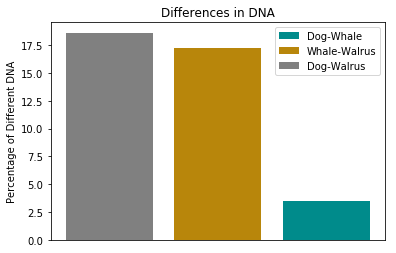

In [10]:
import matplotlib.pyplot as plt
#Bar Graph of the Differences
plt.clf()
plt.bar(3, Walrus_Dog, color = "darkcyan")
plt.bar(2, Walrus_Whale, color = "darkgoldenrod")
plt.bar(1, Whale_Dog, color = "grey")
plt.ylabel("Percentage of Different DNA")
plt.xticks([]) #Clears the x ticks 
plt.title("Differences in DNA")
plt.legend(labels = ["Dog-Whale", "Whale-Walrus", "Dog-Walrus"])
plt.savefig("Differences in DNA.jpg")
plt.show()

## Coding Challenge
If you finish your project and want to try a challenge, come up with a hypothesis about which of the following species are most closely related to humans (carp, chicken, chimp, dog, eel, elephant, frog, gorilla, macaque monkey, mouse, orangutan, pig). Write out a ranked list with the species you think is most related to humans at the top.

Then calculate the percent difference between the hemoglobin amino acid sequences of humans and each species to find out how close you came to the right ranking!

In [11]:
#Opening of the different animal files
gorilla = open("Gorilla_hemoglobin.txt").read()
human = open("Human_hemoglobin.txt").read()
macaque = open("Macaque_hemoglobin.txt").read()
orangutan = open("Orangutan_hemoglobin.txt").read()

In [12]:
#Running function in order to find the % difference between the animals
human_gorilla = perc_differences(human, gorilla)
human_macaque = perc_differences(human, macaque)
human_orangutan = perc_differences(human, orangutan)


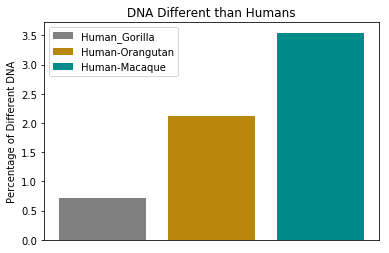

In [18]:
#Graphing the differences
plt.clf()
plt.bar(1, human_gorilla, color = "grey")
plt.bar(2, human_orangutan, color = "darkgoldenrod")
plt.bar(3, human_macaque, color = "darkcyan")
plt.ylabel("Percentage of Different DNA")
plt.xticks([]) #Clearing the x-ticks
plt.title("DNA Different than Humans")
plt.legend(labels = ["Human_Gorilla", "Human-Orangutan", "Human-Macaque"], loc = "upper left")
plt.savefig("Coding Challenge")
plt.show()
